<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|██████████| 1.03G/1.03G [00:14<00:00, 78.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [ ]:
0# Listing the directories in the path in a list

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [ ]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['Z', 'I', 'del', 'V', 'C', 'W', 'N', 'space', 'nothing', 'F', 'U', 'S', 'G', 'K', 'Y', 'T', 'Q', 'A', 'D', 'O', 'H', 'E', 'R', 'X', 'P', 'B', 'L', 'J', 'M']
Total classes: 29


In [ ]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['T_test.jpg', 'O_test.jpg', 'V_test.jpg', 'G_test.jpg', 'X_test.jpg', 'W_test.jpg', 'Y_test.jpg', 'E_test.jpg', 'F_test.jpg', 'J_test.jpg', 'L_test.jpg', 'nothing_test.jpg', 'C_test.jpg', 'Q_test.jpg', 'I_test.jpg', 'S_test.jpg', 'M_test.jpg', 'H_test.jpg', 'P_test.jpg', 'A_test.jpg', 'Z_test.jpg', 'space_test.jpg', 'B_test.jpg', 'R_test.jpg', 'N_test.jpg', 'D_test.jpg', 'U_test.jpg', 'K_test.jpg']
Total classes: 28


/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/del/del1760.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/nothing/nothing168.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/P/P911.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/G/G2454.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/F/F293.jpg


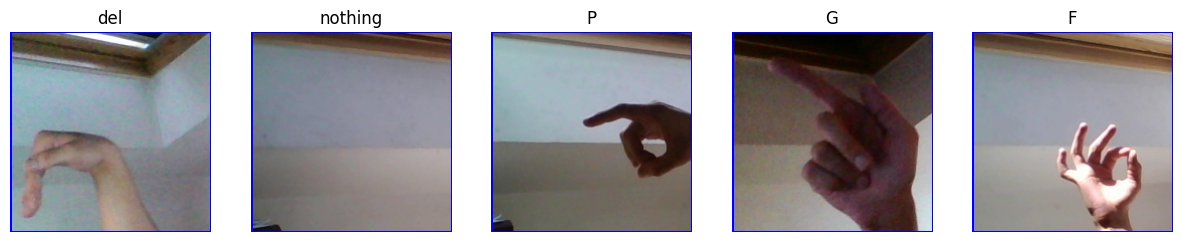

In [ ]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [ ]:

# Define paths
input_dir = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [00:59<00:00,  2.04s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [ ]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['Z', 'I', 'del', 'V', 'C', 'W', 'N', 'space', 'nothing', 'F', 'U', 'S', 'G', 'K', 'Y', 'T', 'Q', 'A', 'D', 'O', 'H', 'E', 'R', 'X', 'P', 'B', 'L', 'J', 'M']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/C/C1744.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/U/U1446.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/G/G594.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/N/N2476.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/C/C635.jpg


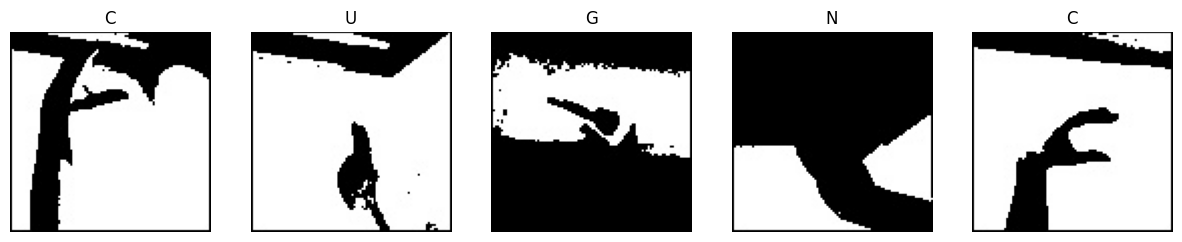

In [ ]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np

# Enable mixed precision for faster training (if GPU supports it)
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Constants
IMAGE_SIZE = (160, 160)  # Reduced from 224 for faster training
BATCH_SIZE = 64  # Increased batch size for better GPU utilization
TRAIN_DIR = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
VAL_DIR = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create efficient tf.data pipeline
def create_dataset(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, *IMAGE_SIZE, 3], [None, 29])
    )
    return dataset.prefetch(tf.data.AUTOTUNE)

train_dataset = create_dataset(train_generator)
val_dataset = create_dataset(val_generator)

# Load ResNet50 with pre-trained weights
base_model = ResNet50(
    input_shape=(*IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'  # Global average pooling
)

# Freeze base model initially
base_model.trainable = False

# Custom head
inputs = keras.Input(shape=(*IMAGE_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(29, activation='softmax', dtype='float32')(x)

model = keras.Model(inputs, outputs)

# Learning rate schedule with warmup
def lr_schedule(epoch):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return 0.001 * (epoch + 1) / warmup_epochs
    return 0.001 * tf.math.exp(0.1 * (warmup_epochs - epoch))

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint('best_resnet50_model.h5', save_best_only=True),
    keras.callbacks.LearningRateScheduler(lr_schedule)
]

# Compile with label smoothing
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Initial training
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_dataset,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze first 100 layers
    layer.trainable = False

# Lower learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy']
)

# Fine-tuning
history_finetune = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# Save final model
model.save('asl_resnet50_final.h5')

Found 87000 images belonging to 29 classes.
Found 87000 images belonging to 29 classes.
Epoch 1/20
  82/1360 ━━━━━━━━━━━━━━━━━━━━ 3:20:33 9s/step - accuracy: 0.0343 - loss: 4.2563